In [1]:
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
'''


c:\ProgramData\anaconda3\envs\py310\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
'''
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            resized_image = cv2.resize(image, (128, 128))
            normalized_image = resized_image / 255.0
            images.append(normalized_image)
            labels.append(label)
    return np.array(images), np.array(labels)
    '''

In [3]:
'''
# Load the trained model
model = load_model('C:\\Users\\rohan\\OneDrive\\Documents\\DIP\\dip.keras')

# Load and preprocess images
real_images_folder = "C:\\Users\\rohan\\OneDrive\\Desktop\\CASIA2\\Au"
manipulated_images_folder = "C:\\Users\\rohan\\OneDrive\\Desktop\\CASIA2\\Tp"
real_images, real_labels = load_and_preprocess_images(real_images_folder, 0)
manipulated_images, manipulated_labels = load_and_preprocess_images(manipulated_images_folder, 1)

'''

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6


In [4]:
'''
# Combine real and manipulated images and labels
all_images = np.concatenate((real_images, manipulated_images), axis=0)
all_labels = np.concatenate((real_labels, manipulated_labels), axis=0)

# Predict probabilities for all images in batches
batch_size = 32  # Adjust the batch size as needed
predicted_probs = []

for i in range(0, len(all_images), batch_size):
    batch_images = all_images[i:i + batch_size]
    batch_probs = model.predict(batch_images)
    predicted_probs.extend(batch_probs)

predicted_probs = np.array(predicted_probs)
'''

1/1 [==============================] - 0s 150ms/step


In [5]:
'''
# Calculate precision-recall pairs for different thresholds
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score

# Calculate precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(all_labels, predicted_probs)

# Calculate F1 scores for each threshold
f1_scores = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls) if (p + r) > 0]

# Find the threshold that gives the maximum F1 score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')
print(f'Best F1-Score: {f1_scores[best_threshold_index]}')
'''

Best Threshold: 0.3835488259792328
Best F1-Score: 0.720792738779249


In [6]:
'''
# Use the best threshold to make predictions
predicted_classes = (predicted_probs >= best_threshold).astype(int)

# Evaluate performance with the best threshold
final_precision = precision_score(all_labels, predicted_classes)
final_recall = recall_score(all_labels, predicted_classes)
final_f1 = f1_score(all_labels, predicted_classes)

print(f'Final Precision: {final_precision}')
print(f'Final Recall: {final_recall}')
print(f'Final F1-Score: {final_f1}')
'''

Final Precision: 0.6285216381063027
Final Recall: 0.8448174897520984
Final F1-Score: 0.720792738779249


In [7]:
""""
import json

# Save the best threshold and metrics to a file
metrics = {
    'best_threshold': float(best_threshold),
    'best_f1_score': float(f1_scores[best_threshold_index]),
    'final_precision': float(final_precision),
    'final_recall': float(final_recall),
    'final_f1_score': float(final_f1)
}

with open('model_metrics.json', 'w') as f:
    json.dump(metrics, f)

print("Metrics saved to model_metrics.json")
""""

Metrics saved to model_metrics.json


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import json

c:\ProgramData\anaconda3\envs\py310\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# Load the saved metrics
with open('model_metrics.json', 'r') as f:
    metrics = json.load(f)

best_threshold = metrics['best_threshold']

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    resized_image = cv2.resize(image, (128, 128))
    resized_image = resized_image / 255.0
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image, image

def interpret_prediction(prediction, threshold):
    return 'Manipulated' if prediction >= threshold else 'Original'

1/1 [==============================] - 0s 180ms/step
The given image is Manipulated.


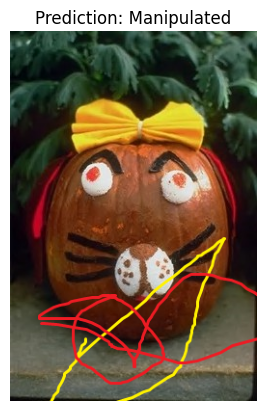

In [10]:
# Load the trained model
model = load_model('C:\\Users\\rohan\\OneDrive\\Documents\\DIP\\dip.keras')

# Example usage for a single image
# image_path = "C:\\Users\\rohan\\OneDrive\\Desktop\\CASIA1\\Sp\\Sp_D_NRN_R_nat0013_nat0012_0572.jpg"
#image_path = "C:\\Users\\rohan\\OneDrive\\Desktop\\CASIA1\\Sp\\Sp_D_NND_A_pla0042_pla0043_0614.jpg"
#image_path = "C:\\Users\\rohan\\OneDrive\\Desktop\\CASIA1\\Sp\\Sp_D_NND_A_pla0058_ani0082_0592.jpg"
# image_path = "C:\\Users\\rohan\\OneDrive\\Desktop\\CASIA1\\Sp\\Sp_D_NND_A_sec0019_ani0006_0618.jpg"
#image_path="C:\\Users\\rohan\\OneDrive\\Desktop\\casia\\CASIA1\\Au\\Au_art_0014.jpg"
#image_path="C:\\Users\\rohan\\Downloads\\My first design 1.png"
image_path = "C:\\Users\\rohan\\OneDrive\\Desktop\\casia\\orivhuv.png"
preprocessed_image, original_image = preprocess_image(image_path)
prediction = model.predict(preprocessed_image)
predicted_class = interpret_prediction(prediction[0], best_threshold)

print(f'The given image is {predicted_class}.')

# Display the image
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title(f'Prediction: {predicted_class}')
plt.axis('off')
plt.show()

In [1]:
pip install streamlit

   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.6 MB 1.7 MB/s eta 0:00:06
   ---------------------------------------- 0.1/8.6 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.2/8.6 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.3/8.6 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.4/8.6 MB 1.8 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/8.6 MB 1.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/8.6 MB 1.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/8.6 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/8.6 MB 1.5 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.6 MB 1.7 MB/s eta 0:00:05
   ---- ----------------------------------- 0.9/8.6 MB 1.7 MB/s eta 0:00:05
   ---- ------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.3 which is incompatible.
tensorflow 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.3 which is incompatible.


In [2]:
pip install protobuf==3.20.1


   ---------------------------------------- 0.0/903.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/903.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/903.8 kB ? eta -:--:--
   - ------------------------------------- 30.7/903.8 kB 217.9 kB/s eta 0:00:05
   -- ------------------------------------ 51.2/903.8 kB 292.6 kB/s eta 0:00:03
   -- ------------------------------------ 51.2/903.8 kB 292.6 kB/s eta 0:00:03
   --- ----------------------------------- 81.9/903.8 kB 306.3 kB/s eta 0:00:03
   ------- ------------------------------ 184.3/903.8 kB 619.5 kB/s eta 0:00:02
   ------- ------------------------------ 184.3/903.8 kB 619.5 kB/s eta 0:00:02
   --------- ---------------------------- 215.0/903.8 kB 570.5 kB/s eta 0:00:02
   ------------ ------------------------- 297.0/903.8 kB 706.2 kB/s eta 0:00:01
   ------------ ------------------------- 297.0/903.8 kB 706.2 kB/s eta 0:00:01
   ------------ ------------------------- 297.0/903.8 kB 706.2 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorflow 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
